In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load words
import json

save_dir = '/content/drive/MyDrive/news-split-data-processed'

with open('{}/top_words_100_peace_bert.json'.format(save_dir), 'r') as f:
    peace_key_words = json.load(f)

with open('{}/top_words_100_unpeace_bert.json'.format(save_dir), 'r') as f:
    unpeace_key_words = json.load(f)


In [ ]:
import gensim.downloader as api

model_gigaword = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
peace_embs = model_gigaword[peace_key_words]
unpeace_embs = model_gigaword[unpeace_key_words]

In [ ]:
# tsne visualization
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

embs = np.concatenate([peace_embs, unpeace_embs])
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, random_state=23)
embs_tsne_2 = tsne.fit_transform(embs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


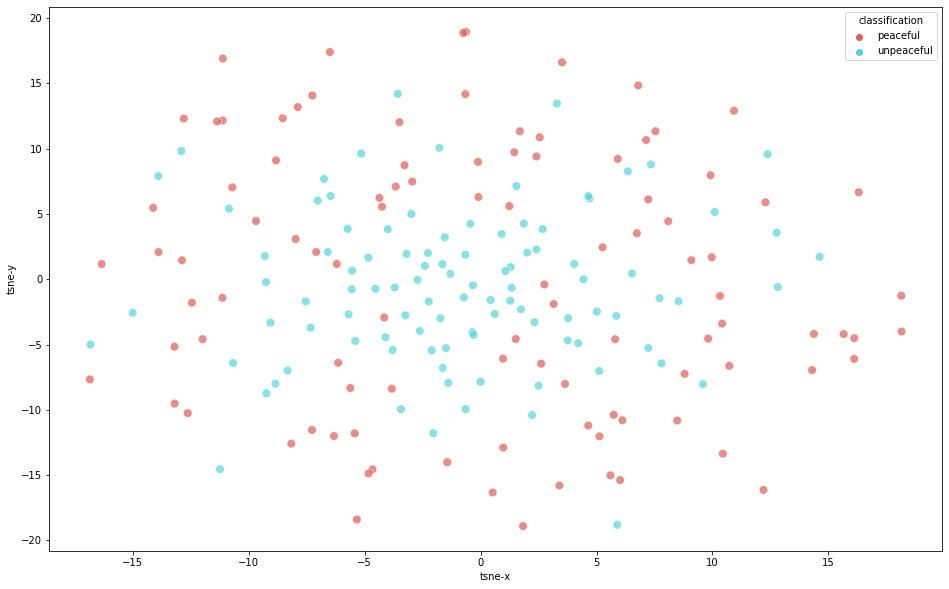

In [ ]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

# construct dataframe
labels = ['peaceful'] * 100 + ['unpeaceful'] * 100
df = pd.DataFrame()
df['tsne-x'] = embs_tsne_2[:, 0]
df['tsne-y'] = embs_tsne_2[:, 1]
df['classification'] = labels
df.head()

# visualize
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-x", y="tsne-y",
    hue="classification",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.7,
    s = 75
)

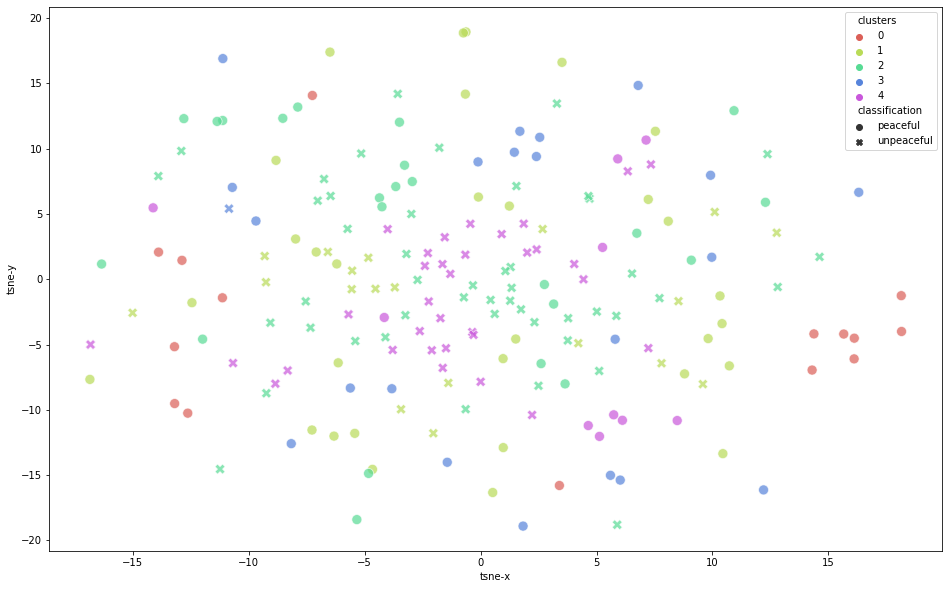

In [ ]:
# k-means
from sklearn.cluster import KMeans

N_CLS = 5
kmeans = KMeans(n_clusters=N_CLS, random_state=23).fit(embs)
clusters = kmeans.predict(embs)
df['clusters'] = clusters

# visualize against clusters
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-x", y="tsne-y",
    hue="clusters",
    style='classification',
    palette=sns.color_palette("hls", N_CLS),
    data=df,
    legend="full",
    alpha=0.7,
    s = 100
)

In [ ]:
# cluster embeddings
embs_clusters = []
for i in range(kmeans.n_clusters):
    embs_clusters.append(embs[clusters == i])

# get key words from each clusters
keywords_clusters = []
i = 0
for center in kmeans.cluster_centers_:
    kws = model_gigaword.most_similar(positive=[center], topn=10)
    keywords_clusters.append(kws)


keywords for this cluster.
['helicopter', 'patrol', 'air', 'rescue', 'emergency', 'helicopters', 'plane', 'fire', 'landing', 'flight']




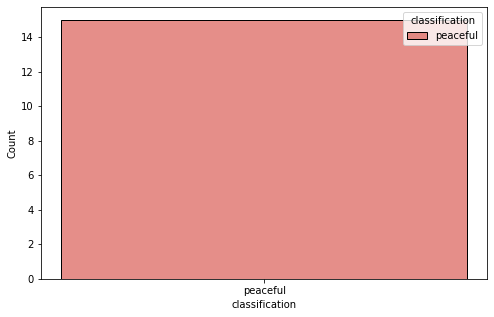

In [ ]:
# cluster 0
print('keywords for this cluster.')
print([kw[0] for kw in keywords_clusters[0]])
print('\n')

# check distribution of words in this cluster
plt.figure(figsize=(8,5))
sns.histplot(
    x="classification",
    hue='classification',
    palette=sns.color_palette("hls", 1),
    data=df.loc[clusters == 0],
    legend="full",
    alpha=0.7
)
plt.show()

keywords for this cluster.
['well', 'because', 'even', 'same', 'those', 'this', 'though', 'rather', 'so', 'only']




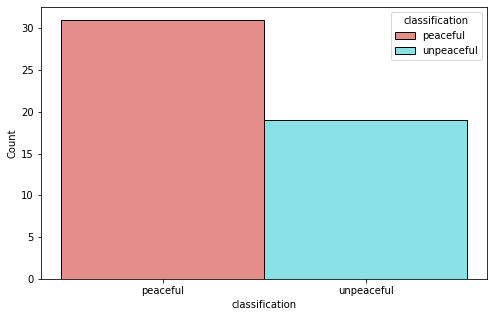

In [ ]:
# cluster 1
print('keywords for this cluster.')
print([kw[0] for kw in keywords_clusters[1]])
print('\n')

# check distribution of words in this cluster
plt.figure(figsize=(8,5))
sns.histplot(
    x="classification",
    hue='classification',
    palette=sns.color_palette("hls", 2),
    data=df.loc[clusters == 1],
    legend="full",
    alpha=0.7
)
plt.show()

keywords for this cluster.
['came', 'time', 'first', 'last', 'one', 'the', 'well', 'took', 'later', 'once']




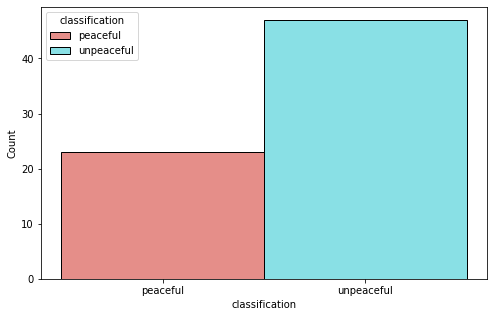

In [ ]:
# cluster 2
print('keywords for this cluster.')
print([kw[0] for kw in keywords_clusters[2]])
print('\n')

# check distribution of words in this cluster
plt.figure(figsize=(8, 5))
sns.histplot(
    x="classification",
    hue='classification',
    palette=sns.color_palette("hls", 2),
    data=df.loc[clusters == 2],
    legend="full",
    alpha=0.7
)
plt.show()

keywords for this cluster.
['businesses', 'employees', 'jobs', 'workers', 'homes', 'customers', 'pay', 'cost', 'companies', 'costs']




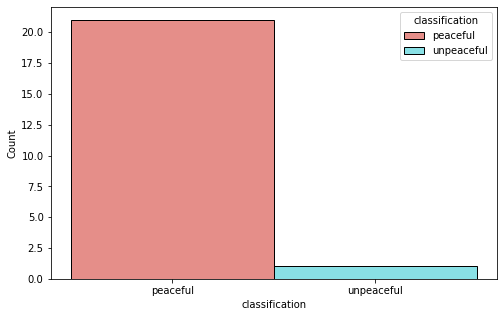

In [ ]:
# cluster 3
print('keywords for this cluster.')
print([kw[0] for kw in keywords_clusters[3]])
print('\n')

# check distribution of words in this cluster
plt.figure(figsize=(8, 5))
sns.histplot(
    x="classification",
    hue='classification',
    palette=sns.color_palette("hls", 2),
    data=df.loc[clusters == 3],
    legend="full",
    alpha=0.7
)
plt.show()

keywords for this cluster.
['officials', 'saying', 'asked', 'suggested', 'authorities', 'denied', 'statement', 'refused', 'acknowledged', 'earlier']




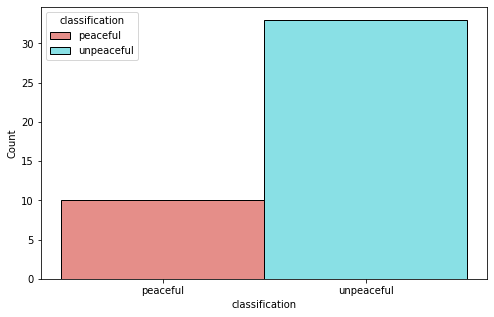

In [ ]:
# cluster 4
print('keywords for this cluster.')
print([kw[0] for kw in keywords_clusters[4]])
print('\n')

# check distribution of words in this cluster
plt.figure(figsize=(8, 5))
sns.histplot(
    x="classification",
    hue='classification',
    palette=sns.color_palette("hls", 2),
    data=df.loc[clusters == 4],
    legend="full",
    alpha=0.7
)
plt.show()